In [24]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression 

import  statsmodels.api as sm

In [39]:
import seaborn as sns

In [8]:
df = pd.read_csv('data/Advertising.csv', index_col=0)

In [9]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [10]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### simple linear regression model

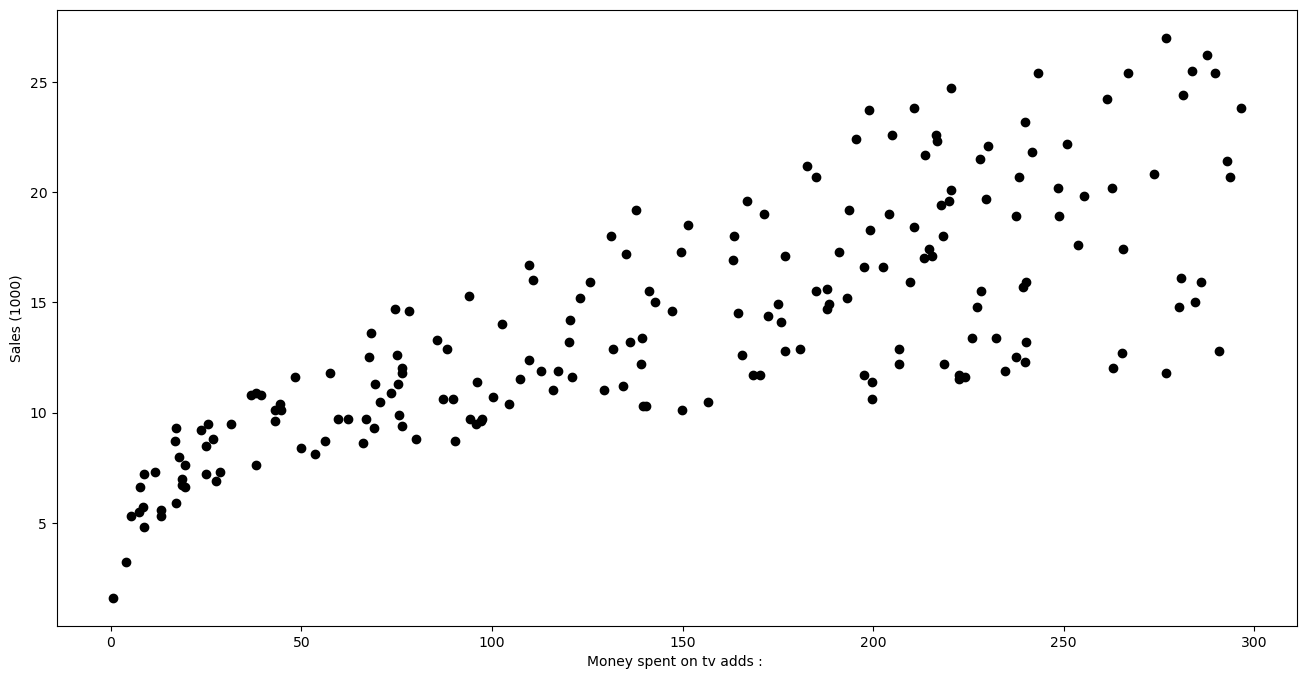

In [11]:
plt.figure(figsize=(16, 8))
plt.scatter(df['TV'], df['sales'], c='black')
plt.xlabel('Money spent on tv adds : ')
plt.ylabel("Sales (1000)")
plt.show()

In [41]:
corr = df.corr()

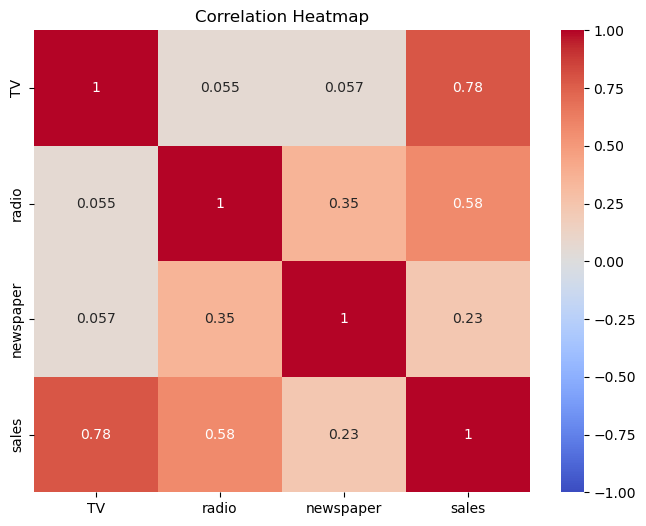

In [42]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [20]:
# reshaping the data
X = df['TV'].values.reshape(-1,1)
Y = df['sales'].values.reshape(-1,1)

### model building

In [25]:
reg = LinearRegression()
reg.fit(X, Y)

LinearRegression()

In [31]:
print(f"The linear regression model is as follow :\n sales = {reg.intercept_[0]} + {reg.coef_[0][0]}*TV")

The linear regression model is as follow :
 sales = 7.0325935491276885 + 0.04753664043301979*TV


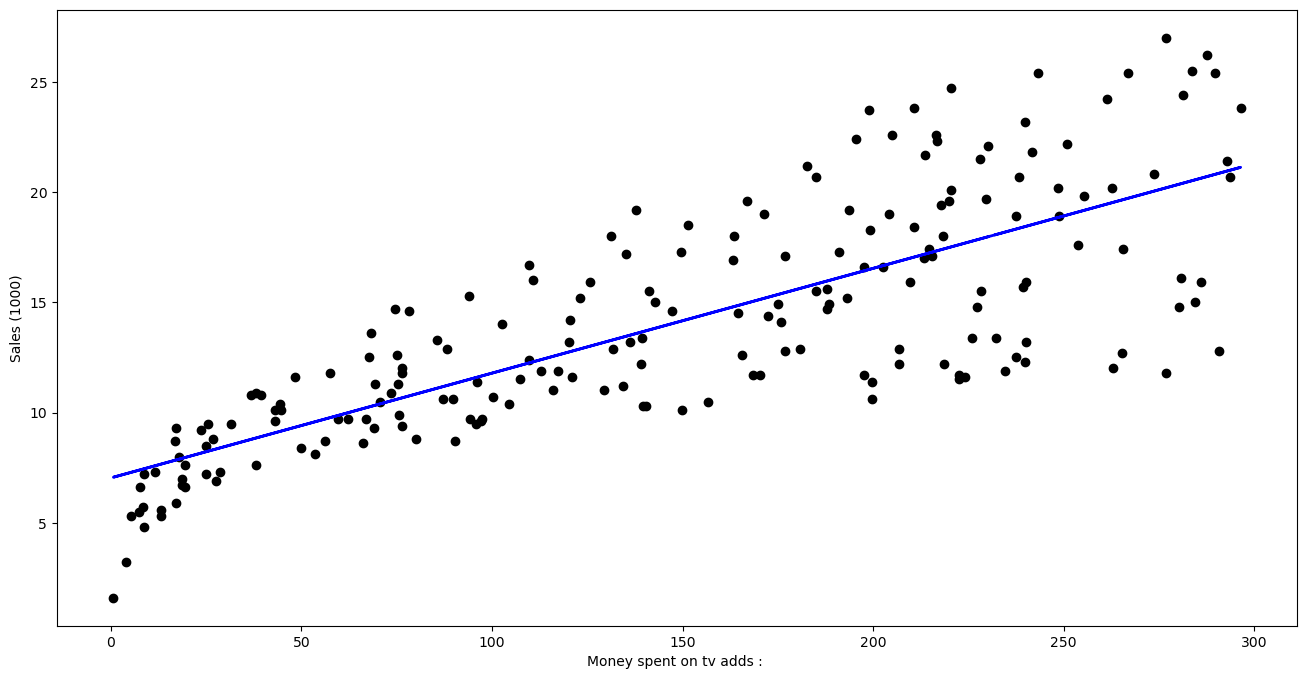

In [37]:
#plotting the output

prediction = reg.predict(X)

plt.figure(figsize=(16,8))
plt.scatter(X, Y, c='black')
plt.plot(X, prediction, c='blue', linewidth = 2)
plt.xlabel('Money spent on tv adds : ')
plt.ylabel("Sales (1000)")
plt.show()


# checking the quality of the model

In [38]:
X = df['TV']
Y = df['sales']

exog = sm.add_constant(X)
est = sm.OLS(Y, exog).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 16 Jan 2025   Prob (F-statistic):           1.47e-42
Time:                        14:22:14   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

### multiple linear regression

In [43]:
X = df.drop(['sales'], axis=1)
y = df['sales'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [44]:
print(f"The new regression model is as follow : \n sales = {reg.intercept_[0]} + {reg.coef_[0][0]}*TV + {reg.coef_[0][1]}*radio + {reg.coef_[0][2]}*newspaper ")

The new regression model is as follow : 
 sales = 2.9388893694594014 + 0.04576464545539764*TV + 0.18853001691820453*radio + -0.0010374930424762346*newspaper 


# assessing the model

In [45]:
X = np.column_stack((df['TV'], df['radio'], df['newspaper']))
Y = df['sales'].values.reshape(-1,1)

exog = sm.add_constant(X)
est = sm.OLS(Y, exog).fit()

print(est.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 16 Jan 2025   Prob (F-statistic):           1.58e-96
Time:                        14:31:24   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0